In [1]:
import os
import sys
import autoreload
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)
%load_ext autoreload
%autoreload 2

In [2]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.preprocessing_helper import PreprocessingHelper

In [4]:
max_doc_len = 200
vocab_size = 50000


In [5]:
prep_helper = PreprocessingHelper(module_path, max_doc_len, vocab_size + 1)

preprocessed data loaded from /home/ximing/dl/projects/movie-review/data/preprocessed_data.pickle
Training data: (24975, 200)
Training label: (24975,)
Validation data: (25, 200)
Validation lable: (25,)
Test set (25000, 200)


In [6]:
model_config = {
    "embedding_size":256,
    "lstm_units": 128,
    "dense_units": [256],
    "doc_len": 200,
    "vocab_size":5000
}

In [7]:
from src.lstm_keras import ModelLSTM

In [8]:
lstm_model = ModelLSTM(module_path, model_config, verbose=True)

Found matching configuration with id: 2
Found existing trained weights, loaded to model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 256)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,511,425
Trainable params: 1,510,913
Non-trainable params: 512
_________________________________________________________________
None


In [9]:
training_config = {
    "steps_p_epoch": 8,
    "eps": 100,
    "val_data": (prep_helper.X_val, prep_helper.y_val),
    "val_freq": 1, 
    "verbose": True,
    "lr": 0.001
}
bs = 12


In [10]:
# prep_helper.X_train.shape
# prep_helper.X_train[0, :]

In [11]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [12]:
history = lstm_model.train(train_generator=prep_helper.train_batch_generator(bs), train_config=training_config)

Found existing trained weights, loaded to model
Epoch 1/100
8/8 [==============================] - 4s 451ms/step - loss: 0.5796 - acc: 0.7292 - val_loss: 0.4567 - val_acc: 0.6800
Epoch 2/100
8/8 [==============================] - 2s 254ms/step - loss: 0.6119 - acc: 0.7292 - val_loss: 0.4673 - val_acc: 0.5600
Epoch 3/100
8/8 [==============================] - 2s 251ms/step - loss: 0.5104 - acc: 0.7812 - val_loss: 0.4178 - val_acc: 0.5600
Epoch 4/100
8/8 [==============================] - 2s 262ms/step - loss: 0.4993 - acc: 0.7500 - val_loss: 0.4028 - val_acc: 0.8400
Epoch 5/100
8/8 [==============================] - 2s 251ms/step - loss: 0.5118 - acc: 0.7604 - val_loss: 0.4170 - val_acc: 0.8400
Epoch 6/100
8/8 [==============================] - 2s 249ms/step - loss: 0.4222 - acc: 0.8333 - val_loss: 0.4604 - val_acc: 0.8000
Epoch 7/100
8/8 [==============================] - 2s 261ms/step - loss: 0.4511 - acc: 0.8021 - val_loss: 0.4901 - val_acc: 0.8000
Epoch 8/100
8/8 [==================

Epoch 63/100
8/8 [==============================] - 2s 254ms/step - loss: 0.4817 - acc: 0.7396 - val_loss: 0.4506 - val_acc: 0.6400
Epoch 64/100
8/8 [==============================] - 2s 262ms/step - loss: 0.5125 - acc: 0.7917 - val_loss: 0.3744 - val_acc: 0.8400
Epoch 65/100
8/8 [==============================] - 2s 257ms/step - loss: 0.4608 - acc: 0.8229 - val_loss: 0.4013 - val_acc: 0.8400
Epoch 66/100
8/8 [==============================] - 2s 256ms/step - loss: 0.3711 - acc: 0.8646 - val_loss: 0.4135 - val_acc: 0.8400
Epoch 67/100
8/8 [==============================] - 2s 259ms/step - loss: 0.3966 - acc: 0.8542 - val_loss: 0.4270 - val_acc: 0.8400
Epoch 68/100
8/8 [==============================] - 2s 256ms/step - loss: 0.3606 - acc: 0.8438 - val_loss: 0.5450 - val_acc: 0.7600
Epoch 69/100
8/8 [==============================] - 2s 256ms/step - loss: 0.3243 - acc: 0.8542 - val_loss: 0.4028 - val_acc: 0.7600
Epoch 70/100
8/8 [==============================] - 2s 261ms/step - loss: 0.

In [13]:
lstm_model.model.evaluate(x=prep_helper.X_val, y=prep_helper.y_val, batch_size=5000)

25/25 [==============================] - 0s 4ms/sample - loss: 0.5350 - acc: 0.7200


[0.5350350737571716, 0.72]

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

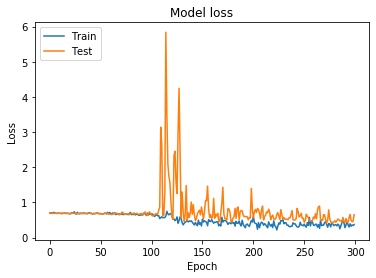

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [10]:
test_text = "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter"
# test_text = "Bad movie, really really bad"
tokenizer = prep_helper.tokenizer
cleaned_text = prep_helper.clean_docs([test_text])
print("cleaned text", cleaned_text)
text_ids = tokenizer.texts_to_sequences(cleaned_text)
# print("Text ids: ", text_ids)
text_ids_padded = pad_sequences(text_ids, maxlen=200, padding="post", truncating="post")
print("input to the model: ", text_ids_padded)
text_ids_padded = np.array(text_ids_padded)
# text_to_model = tokenizer.sequences_to_texts(text_ids_padded)
# print("actual text to model: ", text_to_model)
# print("<UNK> id: ", tokenizer.word_index["<UNKNOWN>"])
# print("<PADDING> is", tokenizer.word_index["<PADDING>"])
lstm_helper = lstm_model
result = lstm_helper.model.predict(text_ids_padded)
print("Prediction: ", result)

cleaned text ['with all this stuff going down at the moment with mj i ve started listening to his music watching the odd documentary here and there watched the wiz and watched moonwalker again maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on fo